## **Data Collection & Preprocessing**

In [ ]:
# import mlflow
# import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import zscore
from sklearn.impute import SimpleImputer
# mlflow.set_experiment("Ridge and Lasso Regression")

# %mlflow run -e my_experiment -P param1=value1 -P param2=value2


# Load the dataset
data = pd.read_csv('/content/water_potability.csv', encoding='ISO-8859-1')

data.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

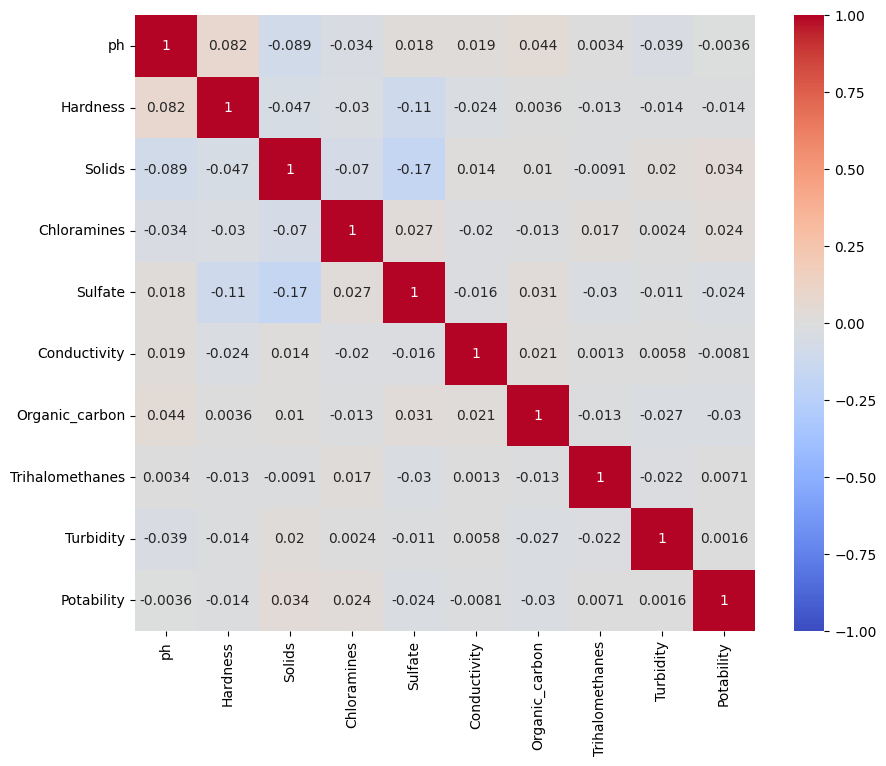

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [ ]:
# df_num = df.select_dtypes(exclude="object")
df_num_col = data.columns
imputer = SimpleImputer(strategy="median")

df_num = imputer.fit_transform(data)
df = pd.DataFrame(df_num, columns=df_num_col)

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1.0


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

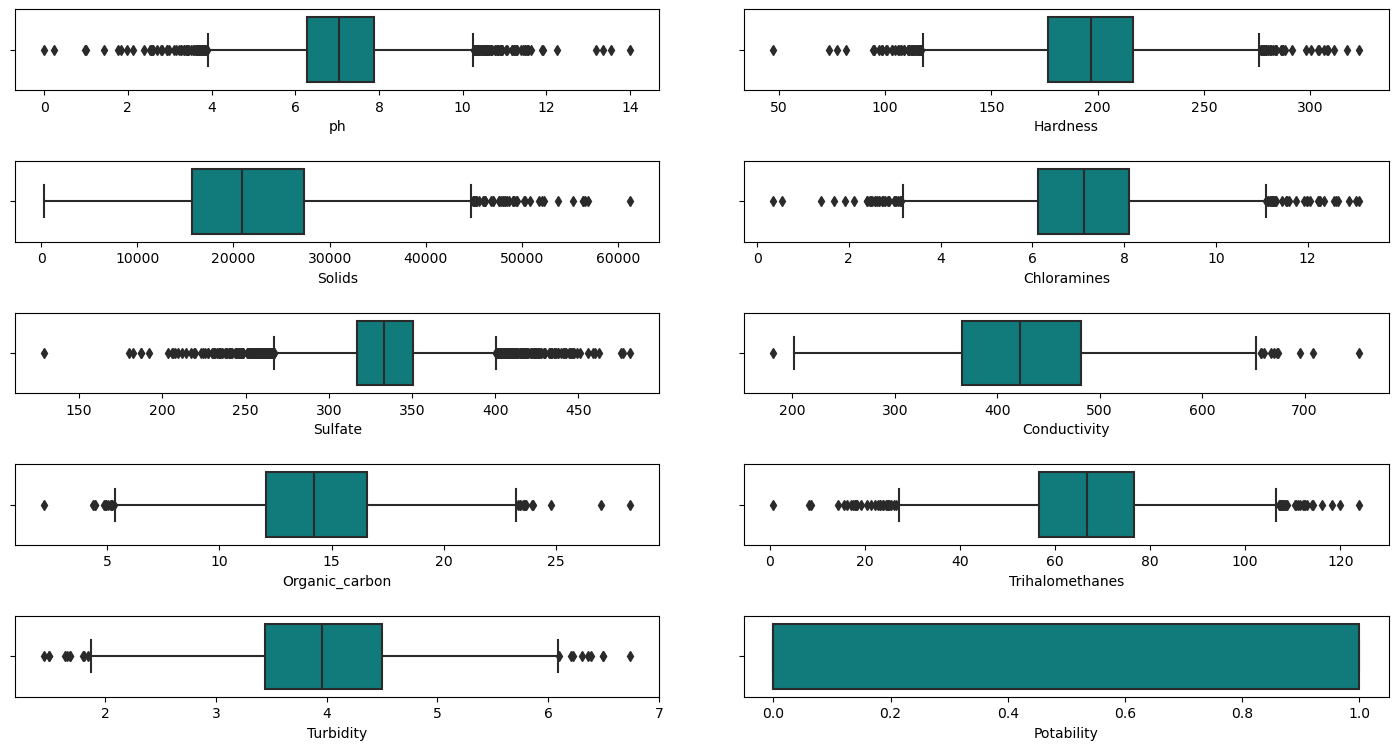

In [ ]:
def distplots(df=df,n=8):
    cols = list(df.columns)
    fig, axes = plt.subplots(5, 2, figsize=(15,8))
    plt.tight_layout(pad=3)
    for col, ax in enumerate(axes.flatten()):
        if df[cols[col]].dtypes=='float64':
            sns.boxplot(x=df[cols[col]], ax=ax, color='darkcyan')
        if col>n:
            break;

distplots(df=df)

In [ ]:
outlier_counts = {}
for col in df.iloc[:,0:8]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # df.loc[outliers.index, col] = df[col].median()
    outlier_counts[col] = len(outliers)

print(outlier_counts)

{'ph': 142, 'Hardness': 83, 'Solids': 47, 'Chloramines': 61, 'Sulfate': 264, 'Conductivity': 11, 'Organic_carbon': 25, 'Trihalomethanes': 54}


In [ ]:
# # outlier_counts = {}
# for col in df.iloc[:,0:8]:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     df.loc[outliers.index, col] = df[col].median()
#     # outlier_counts[col] = len(outliers)

In [ ]:
X = df.iloc[:,0:8]
Y = df['Potability']

## **Model Implementation:**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2620, 8) (656, 8) (2620,) (656,)


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

params = [1, 10, 100, 1000]

for param in params:
    with mlflow.start_run():
        # Initialize Ridge and Lasso models
        ridge_model = Ridge(alpha=param)  # You can adjust the alpha value
        lasso_model = Lasso(alpha=param)  # You can adjust the alpha value

        mlflow.log_param("Alpha", param)

        # Fit models to training data
        ridge_model.fit(X_train, Y_train)
        lasso_model.fit(X_train, Y_train)

        # Make predictions on testing data
        y_pred_ridge = ridge_model.predict(X_test)
        y_pred_lasso = lasso_model.predict(X_test)

        # Calculate RMSE (Root Mean Squared Error)
        rmse_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
        rmse_lasso = np.sqrt(mean_squared_error(Y_test, y_pred_lasso))

        # Calculate R-squared (coefficient of determination)
        r2_ridge = r2_score(Y_test, y_pred_ridge)
        r2_lasso = r2_score(Y_test, y_pred_lasso)

        mlflow.log_metric("rmse_ridge", rmse_ridge)
        mlflow.log_metric("rmse_lasso", rmse_lasso)
        mlflow.log_metric("r2_ridge", r2_ridge)
        mlflow.log_metric("r2_lasso", r2_lasso)

        mlflow.sklearn.log_model(ridge_model, "ridge_model")
        mlflow.sklearn.log_model(lasso_model, "lasso_model")

        # Compare performance
        print("Ridge Regression:")
        print(f"RMSE: {rmse_ridge:.4f}")
        print(f"R-squared: {r2_ridge:.4f}\n")

        print("Lasso Regression:")
        print(f"RMSE: {rmse_lasso:.4f}")
        print(f"R-squared: {r2_lasso:.4f}")

        mlflow.log_artifact("E:\IIT JODHPUR\Trimester 3\MLops\Assign_1\model_created", "config")

Ridge Regression:
RMSE: 0.4833
R-squared: 0.0001

Lasso Regression:
RMSE: 0.4839
R-squared: -0.0026
Ridge Regression:
RMSE: 0.4833
R-squared: 0.0001

Lasso Regression:
RMSE: 0.4839
R-squared: -0.0025
Ridge Regression:
RMSE: 0.4833
R-squared: 0.0001

Lasso Regression:
RMSE: 0.4838
R-squared: -0.0020
Ridge Regression:
RMSE: 0.4833
R-squared: -0.0001

Lasso Regression:
RMSE: 0.4839
R-squared: -0.0022


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_sets = [
    {"max_iter": 100, "solver": "lbfgs"},
    {"max_iter": 200, "solver": "liblinear"},
    {"max_iter": 300, "solver": "saga"}
]

for params in param_sets:
    with mlflow.start_run():

        model = LogisticRegression(max_iter=params["max_iter"], solver=params["solver"])

        mlflow.log_param("max_iter", params["max_iter"])
        mlflow.log_param("solver", params["solver"])
        model.fit(X_train, Y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        clssi_report = classification_report(Y_test, y_pred)
        con_matrix = confusion_matrix(Y_test, y_pred)

        mlflow.log_metric("accuracy", accuracy)
        # mlflow.log_metric("classification_report", clssi_report)
        # mlflow.log_metrics("confusion_matrix", con_matrix)

        mlflow.sklearn.log_model(model, "model")

        print("Accuracy:", accuracy)
        print(clssi_report)
        print("Confusion Matrix:")
        print(con_matrix)

        # mlflow.log_artifact('E:\IIT JODHPUR\Trimester 3\MLops\Assign_1\model_created')
        mlflow.log_artifact("E:\IIT JODHPUR\Trimester 3\MLops\Assign_1\model_created", "config")

for run in mlflow.search_runs():
    print(run)

c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Confusion Matrix:
[[412   0]
 [244   0]]


c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Confusion Matrix:
[[412   0]
 [244   0]]


c:\Users\janes\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\janes\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predict

Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Confusion Matrix:
[[412   0]
 [244   0]]
run_id
experiment_id
status
artifact_uri
start_time
end_time
metrics.accuracy
metrics.rmse_lasso
metrics.rmse_ridge
metrics.r2_ridge
metrics.r2_lasso
params.solver
params.max_iter
params.Alpha
params.alpha_lasso
params.alpha_ridge
tags.mlflow.source.name
tags.mlflow.source.type
tags.mlflow.log-model.history
tags.mlflow.user
tags.mlflow.runName
